<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AQI-Data-(1999---2022)" data-toc-modified-id="AQI-Data-(1999---2022)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AQI Data (1999 - 2022)</a></span></li><li><span><a href="#Green-Space-and-Tree-Canopy-Percentage-Data" data-toc-modified-id="Green-Space-and-Tree-Canopy-Percentage-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Green Space and Tree Canopy Percentage Data</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PCA</a></span><ul class="toc-item"><li><span><a href="#Cleveland,-OH" data-toc-modified-id="Cleveland,-OH-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cleveland, OH</a></span><ul class="toc-item"><li><span><a href="#Import-file" data-toc-modified-id="Import-file-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Import file</a></span></li></ul></li><li><span><a href="#Percent-particulate-matter-[PM2.5]-removed-annually-by-tree-cover" data-toc-modified-id="Percent-particulate-matter-[PM2.5]-removed-annually-by-tree-cover-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Percent particulate matter [PM2.5] removed annually by tree cover</a></span></li><li><span><a href="#Percent-tree-cover-in-50m-buffer" data-toc-modified-id="Percent-tree-cover-in-50m-buffer-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Percent tree cover in 50m buffer</a></span><ul class="toc-item"><li><span><a href="#Train-and-test-split" data-toc-modified-id="Train-and-test-split-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Train and test split</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>SVM</a></span></li></ul></li><li><span><a href="#Los-Angeles,-CA" data-toc-modified-id="Los-Angeles,-CA-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Los Angeles, CA</a></span><ul class="toc-item"><li><span><a href="#Train-and-test-split" data-toc-modified-id="Train-and-test-split-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Train and test split</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>SVM</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import cm
import scipy.stats as stats
import plotly.express as px
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn import metrics
import warnings

import os
import sys

# AQI Data (1999 - 2022)

In [2]:
path = r'D:\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\AQIdata\1999_2022\all_tables.xlsx'
df = pd.read_excel(path)
df.head(5)

,Unnamed: 0,Date,PM2.5 AQI Value,City,Month,Weekday
0,0,1999-01-03,46,Cleveland,January,Sunday
1,1,1999-01-06,62,Cleveland,January,Wednesday
2,2,1999-01-08,112,Cleveland,January,Friday
3,3,1999-01-09,70,Cleveland,January,Saturday
4,4,1999-01-10,82,Cleveland,January,Sunday


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       32220 non-null  int64         
 1   Date             32220 non-null  datetime64[ns]
 2   PM2.5 AQI Value  32220 non-null  int64         
 3   City             32220 non-null  object        
 4   Month            32220 non-null  object        
 5   Weekday          32220 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.5+ MB


In [4]:
# Clean df
df_clean = df[['Date', 'PM2.5 AQI Value', 'City']]
df_clean.columns

Index(['Date', 'PM2.5 AQI Value', 'City'], dtype='object')

In [5]:
# Create a copy df
copy = df_clean.copy()

# Apply log to AQI Value
copy['PM2.5 AQI Value'] = np.log(copy['PM2.5 AQI Value'])
copy

,Date,PM2.5 AQI Value,City
0,1999-01-03,3.828641,Cleveland
1,1999-01-06,4.127134,Cleveland
2,1999-01-08,4.718499,Cleveland
3,1999-01-09,4.248495,Cleveland
4,1999-01-10,4.406719,Cleveland
...,...,...,...
32215,2022-05-30,3.401197,Tampa
32216,2022-05-31,3.465736,Tampa
32217,2022-06-01,3.433987,Tampa
32218,2022-06-02,3.433987,Tampa


# Green Space and Tree Canopy Percentage Data

Recall that we ran into the limitation of not being able to save the aggregate data of all cities and saved data by city. So we'll perform modeling by city. 

# PCA

Using [scikit-learn](https://scikit-learn.org/stable/data_transforms.html), we will perform preprocessing, unsupervised dimensionality reduction (PCA), cross validation, and try different prediction modeling. Our model of interest is SVM. 

Cross validation (CV) is out-of-sample testing and it is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. CV is a resampling method that uses different portions of the data to test and train a model on different iterations.


Fit transform: Each of the *predictor variables* should be scaled to have **mean=0** and **standard deviation=1**, to make sure that no predictor variable is overly influential in the model if it happens to be measured in different units.

## Cleveland, OH

### Import file

In [6]:
path0 = r'D:\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\df_cle.xlsx'
cle = pd.read_excel(path0)
cle.head(2)

,Particulate matter [PM2.5] (kg/yr),Particulate matter [PM10] (kg/yr),Percent tree cover,Percent green space,Tree cover per capita (m2/person),Green space per capita (m2/person),Percent tree cover in 50m buffer,Percent tree cover in 15m buffer,EnviroAtlas Community Name,Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr),Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr),Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr),Value of mortality avoided due to ozone removed ($/yr),Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr),Percent ozone removed annually by tree cover,Percent particulate matter [PM10] removed annually by tree cover,Percent particulate matter [PM2.5] removed annually by tree cover,Percent sulfur dioxide removed annually by tree cover
0,106.5,369.0,3504,6279,119.8,214.7,35.1,31.2,"Cleveland, OH",64,0,48,4429,0,22.5,32.5,12.5,17.1
1,106.5,369.0,3504,6279,119.8,214.7,35.1,31.2,"Cleveland, OH",50,0,38,3520,0,16.3,23.5,9.2,12.4


In [7]:
cle.shape

(315288, 18)

In [8]:
# Drop any object dtype
cle = cle.drop(columns='EnviroAtlas Community Name')

## Percent particulate matter [PM2.5] removed annually by tree cover

array([[<AxesSubplot:title={'center':'Percent particulate matter [PM2.5] removed annually by tree cover'}>]],
      dtype=object)

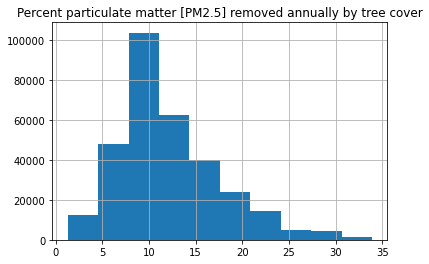

In [9]:
pd.DataFrame(cle['Percent particulate matter [PM2.5] removed annually by tree cover']).hist()

In [10]:
# Create a subset with <= 1000 data points
cle_subset = cle.iloc[0:1000]
cle_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Particulate matter [PM2.5] (kg/yr)                                                       1000 non-null   float64
 1   Particulate matter [PM10] (kg/yr)                                                        1000 non-null   float64
 2   Percent tree cover                                                                       1000 non-null   int64  
 3   Percent green space                                                                      1000 non-null   int64  
 4   Tree cover per capita (m2/person)                                                        1000 non-null   float64
 5   Green space per capita (m2/person)                             

In [11]:
# Dataset with unique values based on 'Percent tree cover in 50m buffer'
#cle_unique = cle.drop_duplicates(subset = ["Percent tree cover in 50m buffer"])
#cle_unique.columns

In [12]:
cle_ = cle[['Particulate matter [PM2.5] (kg/yr)','Percent tree cover in 50m buffer']]

In [13]:
cle_buffer = cle_.groupby(by = 'Percent tree cover in 50m buffer')['Particulate matter [PM2.5] (kg/yr)'].median()
cle_buffer.head()

Percent tree cover in 50m buffer
0.0     59.05
1.1     73.20
1.6     13.10
2.0     58.20
2.1    212.50
Name: Particulate matter [PM2.5] (kg/yr), dtype: float64

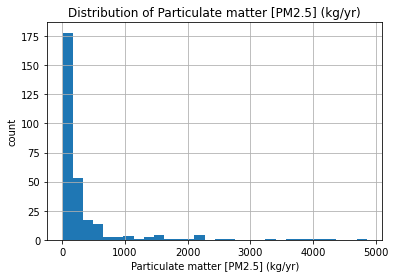

In [14]:
cle_buffer.hist(bins=30)
plt.title('Distribution of Particulate matter [PM2.5] (kg/yr)')
plt.xlabel('Particulate matter [PM2.5] (kg/yr)')
plt.ylabel('count');

<AxesSubplot:xlabel='Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)', ylabel='count'>

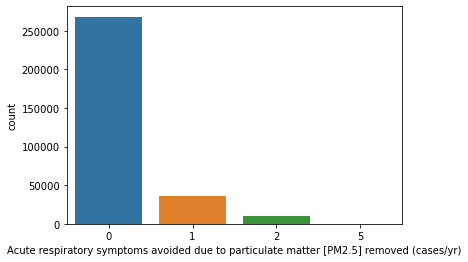

In [15]:
sns.countplot(x="Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)", data=cle)

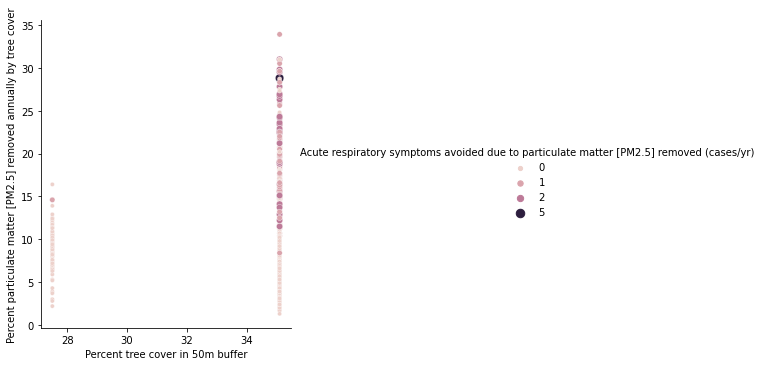

In [16]:
sns.relplot(x="Percent tree cover in 50m buffer", y="Percent particulate matter [PM2.5] removed annually by tree cover", data=cle_subset, kind="scatter", size="Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)", hue="Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)")

## Percent tree cover in 50m buffer

### Train and test split

In [13]:
# Define X and y
X = cle[[i for i in cle.columns if i not in ["Percent particulate matter [PM2.5] removed annually by tree cover"]]]
y = cle["Percent particulate matter [PM2.5] removed annually by tree cover"]

In [14]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [15]:
print(X.shape)
print(y.shape)

(315288, 16)
(315288,)


In [16]:
print(X_train.shape)
print(y_train.shape)

(252230, 16)
(252230,)


In [17]:
#  Normalize data using StandardScaler()
scaler = StandardScaler()
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [18]:
# Return biased estimate
X_train_norm.std(ddof = 0)

Particulate matter [PM2.5] (kg/yr)                                                         1.0
Particulate matter [PM10] (kg/yr)                                                          1.0
Percent tree cover                                                                         1.0
Percent green space                                                                        1.0
Tree cover per capita (m2/person)                                                          1.0
Green space per capita (m2/person)                                                         1.0
Percent tree cover in 50m buffer                                                           1.0
Percent tree cover in 15m buffer                                                           1.0
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)                1.0
Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)                     1.0
Value of asthma exacerbation cases avoided due to 

In [19]:
# Return biased estimate
X_test_norm.std(ddof = 0)

Particulate matter [PM2.5] (kg/yr)                                                         0.998922
Particulate matter [PM10] (kg/yr)                                                          0.997567
Percent tree cover                                                                         0.996647
Percent green space                                                                        0.997430
Tree cover per capita (m2/person)                                                          0.988756
Green space per capita (m2/person)                                                         0.988962
Percent tree cover in 50m buffer                                                           0.998601
Percent tree cover in 15m buffer                                                           0.990397
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)                0.989285
Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)                     0.987550


In [20]:
# Predictor variables scaling
pca = PCA()
X_red = pca.fit_transform(scale(X_train_norm))
# Define CV
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 123)

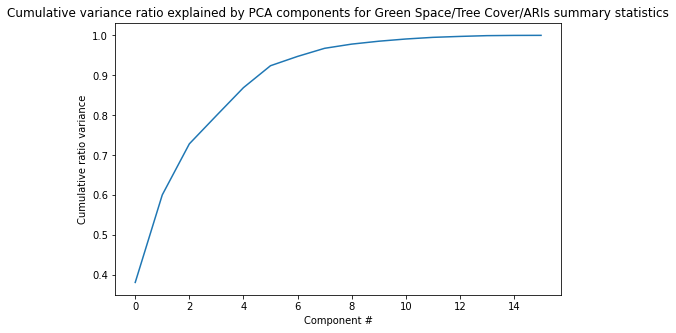

In [21]:
# Plot cumulative variance ratio 
plt.subplots(figsize=(8, 5))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Green Space/Tree Cover/ARIs summary statistics');

In [22]:
# Percent variance in response variable explained by each addition of principal component to the model
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 38.2 ,  60.1 ,  72.86,  79.93,  86.92,  92.41,  94.74,  96.77,
        97.82,  98.54,  99.09,  99.5 ,  99.74,  99.93,  99.99, 100.  ])

 - 1st principal component accounts for 38.2% of variance.
 - 2nd principal component accounts for 60.1% of variance.
 - 3rd principal component accounts for 72.86% of variance.
 - 4th principal component accounts for 79.93% of variance.
 - 5th principal component accounts for 86.92% of variance
 - nth principal component accounts for 100% of variance.

### Linear Regression

Let's look at our RMSE scores using linear regression and plot our cross-validation results

In [23]:
y_train.shape

(252230,)

In [24]:
X_train.shape

(252230, 16)

In [25]:
from sklearn import linear_model, preprocessing

lin_reg = linear_model.LinearRegression()

In [26]:
lin_reg.fit(X_train, y_train)
# Evaluate the model  
lin_reg.score(X_train, y_train)
# Use the model to make predictions about our test data
y_predict = lin_reg.predict(X_test)

In [27]:
y_predict

array([19.72692953, 19.68871318, 23.46531762, ..., 13.47412419,
       16.17608319, 16.56977742])

In [28]:
# Create and print dataframe accounting for '
# Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)' from y_predict
ARI_pred = pd.DataFrame(y_predict, columns = ['Percent particulate matter [PM2.5] removed annually by tree cover'])
ARI_pred.head()

,Percent particulate matter [PM2.5] removed annually by tree cover
0,19.726930
1,19.688713
2,23.465318
3,13.620441
4,20.216963


In [29]:
# Create dataframe for actual ARI symptoms avoided due to PM2.5 removed (cases/yr) from y_predict
ARI_actual = pd.DataFrame(y_test)
ARI_actual.head()

,Percent particulate matter [PM2.5] removed annually by tree cover
219788,20.2
11128,20.1
178951,23.6
228125,13.5
69747,20.2


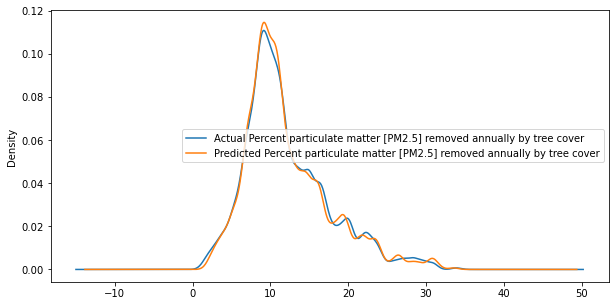

In [30]:
# Plot predicted vs actual
ax = ARI_actual.plot(kind = 'density', figsize = (10,5))
ARI_pred.plot(kind = 'density', figsize = (10,5), ax = ax)
L = plt.legend()
L.get_texts()[0].set_text('Actual Percent particulate matter [PM2.5] removed annually by tree cover')
L.get_texts()[1].set_text('Predicted Percent particulate matter [PM2.5] removed annually by tree cover')
plt.show()

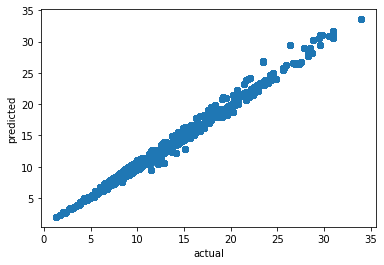

In [31]:
# Let's plot the predictions against the actual result. Use scatter()
_ = plt.scatter(y_test, y_predict)
_ = plt.xlabel("actual")
_ = plt.ylabel("predicted")
plt.show()

### SVM

**What:** A generalization of the classification; the model returns a continuous-valued variable (one which can take on an uncountable set of values, any range of real numbers between and with, vs. discrete values). Our value for this project is going to target "Percent particulate matter removed annually by tree cover". 

**Why:** SVM solves a binary classification via convex optimization

In [32]:
# Perform another train and test split
X1 = cle[[i for i in cle.columns if i not in ["Percent particulate matter [PM2.5] removed annually by tree cover"]]]
y1 = cle["Percent particulate matter [PM2.5] removed annually by tree cover"]

# Train and test split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.25,random_state = 123) 

In [33]:
# Preprocess with StandardScaler()
scale = StandardScaler()

# Fit_transform for predictors
X_train1_svm = scale.fit_transform(X_train1)
X_test1_svm = scale.fit_transform(X_test1)

In [34]:
print('Shape for x train: ',X_train1_svm.shape)
print('Shape for x test: ', X_test1_svm.shape)
print('Shape for y train: ', y_train1.shape)
print('Shape for y test: ', y_test1.shape)

Shape for x train:  (236466, 16)
Shape for x test:  (78822, 16)
Shape for y train:  (236466,)
Shape for y test:  (78822,)


In [35]:
# Fit_transform response variables
y_train1_svm = scale.fit_transform(y_train1.to_numpy().reshape(-1,1))
y_test1_svm =  scale.fit_transform(y_test1.to_numpy().reshape(-1,1))

In [36]:
print(y_train1_svm.shape)
print(y_test1_svm.shape)

(236466, 1)
(78822, 1)


In [37]:
# I ran into an issue running SVR with the original dataset size,
# So I decided to use 30% of the total number of rows. 
Xtrain1_svm_new = X_train1_svm[0:70940]
ytrain1_svm_new = y_train1_svm[0:70940]

In [38]:
print(ytrain1_svm_new.shape)

(70940, 1)


In [39]:
# Define SVR 
svr = SVR(kernel = 'rbf')
model_svr = svr.fit(Xtrain1_svm_new, np.ravel(ytrain1_svm_new))
y_predict1 = model_svr.predict(Xtrain1_svm_new)

In [40]:
# Assess MSE score
score = model_svr.score(Xtrain1_svm_new,ytrain1_svm_new)
print("Score R-squared :", score*100)
print("MSE :", mean_squared_error(ytrain1_svm_new, y_predict1))

Score R-squared : 99.70650127918503
MSE : 0.002940137130245674


These are really good scores! Our MSE is close to 0, meaning the predicted values are almost the same as the expected values, meaning our model performed well. 

Recall our target value was 'Percent tree cover in 50m buffer'. 

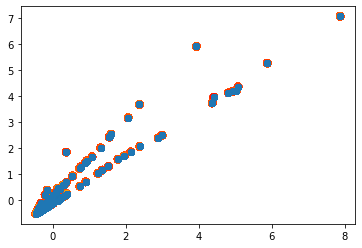

In [41]:
plt.scatter(Xtrain1_svm_new[:, 0], Xtrain1_svm_new[:, 1], c=ytrain1_svm_new, s=50, cmap='autumn')
plt.scatter(model_svr.support_vectors_[:,0],model_svr.support_vectors_[:,1])

## Los Angeles, CA

In [42]:
path1 = r'D:\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\df_la.xlsx'
la = pd.read_excel(path1)
la.head(2)

,Particulate matter [PM2.5] (kg/yr),Particulate matter [PM10] (kg/yr),Percent tree cover,Percent green space,Tree cover per capita (m2/person),Green space per capita (m2/person),Percent tree cover in 50m buffer,Percent tree cover in 15m buffer,EnviroAtlas Community Name,Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr),Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr),Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr),Value of mortality avoided due to ozone removed ($/yr),Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr),Percent ozone removed annually by tree cover,Percent particulate matter [PM10] removed annually by tree cover,Percent particulate matter [PM2.5] removed annually by tree cover,Percent sulfur dioxide removed annually by tree cover
0,31.6,1174.2,2510,5053,173,349,22.5,21.0,"Los Angeles, CA",232,4,388,9411,0,38.9,101.3,1.4,26.3
1,31.6,1174.2,2510,5053,173,349,22.5,21.0,"Los Angeles, CA",162,3,270,6567,0,30.0,78.3,1.1,20.2


In [43]:
# Drop any object dtype
la = la.drop(columns='EnviroAtlas Community Name')

In [47]:
la['Percent tree cover in 50m buffer'].unique()

array([ 2.2500e+01,  3.5000e+01,  4.4500e+01,  2.4300e+01,  5.9400e+01,
        4.0700e+01,  4.3400e+01,  3.4600e+01,  4.4300e+01,  4.5400e+01,
        2.5700e+01,  5.3800e+01,  4.6500e+01,  5.2200e+01,  2.3300e+01,
        2.4000e+00,  1.3600e+01,  1.5400e+01,  3.1700e+01,  3.0500e+01,
        4.5700e+01,  1.6900e+01,  3.2500e+01,  2.4200e+01,  5.5000e+00,
        2.5800e+01,  1.2300e+01,  1.8100e+01,  1.9800e+01,  3.8500e+01,
        3.6900e+01,  8.7000e+00,  6.5000e+00,  1.1800e+01,  3.2800e+01,
        1.2400e+01,  2.1100e+01,  1.9300e+01,  1.2700e+01,  1.5700e+01,
        5.1000e+00,  2.1000e+01,  1.3800e+01,  1.1600e+01,  2.1200e+01,
        1.0200e+01,  2.5300e+01,  1.8000e+01,  1.4400e+01,  1.3500e+01,
        2.7800e+01,  2.0300e+01,  3.7000e+00,  1.5200e+01,  3.7400e+01,
        1.0400e+01,  3.3600e+01,  1.4000e+01,  3.8400e+01,  1.2800e+01,
        1.7500e+01,  5.1400e+01,  1.8500e+01,  2.6200e+01,  3.0300e+01,
        1.5100e+01,  3.9200e+01,  4.5100e+01,  1.3900e+01,  2.60

### Train and test split

In [48]:
# Define X and y
X0 = la[[i for i in la.columns if i not in ["Percent tree cover in 50m buffer"]]]
y0 = la["Percent tree cover in 50m buffer"]

# Split train and test. I'm going to use a test size of 25% this time.
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.25, random_state = 123)

# Check shape for X and y
print(X0.shape)
print(y0.shape)
print(X0_train.shape)
print(y0_train.shape)

(1048575, 16)
(1048575,)
(786431, 16)
(786431,)


In [49]:
#  Normalize data using StandardScaler()
X_train_norm0 = pd.DataFrame(scaler.fit_transform(X0_train),columns=X0_train.columns)
X_test_norm0 = pd.DataFrame(scaler.transform(X0_test),columns=X0_test.columns)

# Return biased estimate
X_train_norm0.std(ddof = 0)

Particulate matter [PM2.5] (kg/yr)                                                         1.0
Particulate matter [PM10] (kg/yr)                                                          1.0
Percent tree cover                                                                         1.0
Percent green space                                                                        1.0
Tree cover per capita (m2/person)                                                          1.0
Green space per capita (m2/person)                                                         1.0
Percent tree cover in 15m buffer                                                           1.0
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)                1.0
Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)                     1.0
Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)          1.0
Value of mortality avoided due to ozone removed ($

In [50]:
# Return biased estimate X test
X_test_norm0.std(ddof = 0)

Particulate matter [PM2.5] (kg/yr)                                                         1.006858
Particulate matter [PM10] (kg/yr)                                                          1.005270
Percent tree cover                                                                         0.999741
Percent green space                                                                        1.001474
Tree cover per capita (m2/person)                                                          1.007435
Green space per capita (m2/person)                                                         1.008100
Percent tree cover in 15m buffer                                                           1.002510
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)                1.002153
Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)                     1.002217
Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)          1.002210


In [51]:
# Predictor variables scaling
pca0 = PCA()
X0_red = pca0.fit_transform(X_train_norm0)
# Define CV
cv0 = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 123)

In [52]:
# Percent variance in response variable explained by each addition of principal component to the model
np.cumsum(np.round(pca0.explained_variance_ratio_, decimals=4)*100)

array([30.63, 57.63, 69.69, 77.75, 83.96, 89.79, 93.41, 95.24, 96.73,
       98.14, 99.1 , 99.66, 99.79, 99.88, 99.94, 99.99])

 - 1st principal component accounts for 28.9% of variance.
 - 2nd principal component accounts for 56.3% of variance.
 - 3rd principal component accounts for 67.3% of variance.
 - 4th principal component accounts for 76.8% of variance.
 - 5th principal component accounts for 84.7% of variance
 - nth principal component accounts for 90.5% of variance.

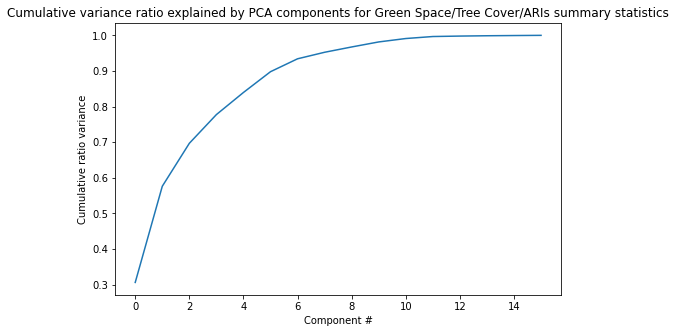

In [53]:
# Plot cumulative variance ratio 
plt.subplots(figsize=(8, 5))
plt.plot(pca0.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Green Space/Tree Cover/ARIs summary statistics');

### Linear Regression

In [54]:
# Create a new variable for linear regression
lin_reg0 = linear_model.LinearRegression()
lin_reg0.fit(X0_train, y0_train)
# Evaluate the model  
lin_reg0.score(X0_train, y0_train)
# Use the model to make predictions about our test data
y_predict0 = lin_reg0.predict(X0_test)
y_predict0

array([ -404.98601432,   -25.76485308,   236.60216892, ...,
        8132.39742917,  1183.30700385, -4759.21858729])

In [55]:
# Create and print dataframe accounting for '
# Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)' from y_predict
ARI_pred_la = pd.DataFrame(y_predict0, columns = ['Percent tree cover in 50m buffer'])
ARI_pred_la.head()

,Percent tree cover in 50m buffer
0,-404.986014
1,-25.764853
2,236.602169
3,3438.305484
4,994.397076


In [56]:
# Create dataframe for actual ARI symptoms avoided due to PM2.5 removed (cases/yr) from y_predict
ARI_actual_la = pd.DataFrame(y0_test)
ARI_actual_la.head()

,Percent tree cover in 50m buffer
933725,20.9
694586,16.3
507508,21.7
169136,6.5
799518,19.8


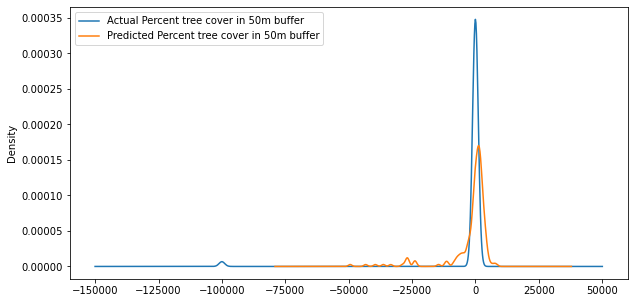

In [57]:
# Plot predicted vs actual
ax = ARI_actual_la.plot(kind = 'density', figsize = (10,5))
ARI_pred_la.plot(kind = 'density', figsize = (10,5), ax = ax)
L0 = plt.legend()
L0.get_texts()[0].set_text('Actual Percent tree cover in 50m buffer')
L0.get_texts()[1].set_text('Predicted Percent tree cover in 50m buffer')
plt.show()

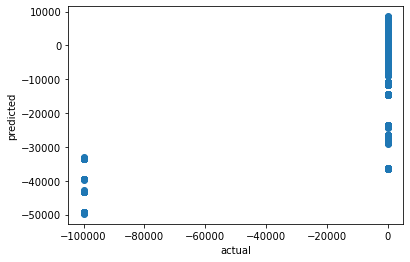

In [58]:
# Let's plot the predictions against the actual result. Use scatter()
_ = plt.scatter(y0_test, y_predict0)
_ = plt.xlabel("actual")
_ = plt.ylabel("predicted")
plt.show()

### SVM

In [59]:
# Perform another train and test split for LA data
X2 = la[[i for i in la.columns if i not in ["Percent tree cover in 50m buffer"]]]
y2 = la["Percent tree cover in 50m buffer"]

# Train and test split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size = 0.20,random_state = 123) 

# Preprocess with StandardScaler()
scale = StandardScaler()

# Fit_transform for predictors
X_train2_svm = scale.fit_transform(X2_train)
X_test2_svm = scale.fit_transform(X2_test)

# Check shape for each train and test
print('Shape for x train: ',X_train2_svm.shape)
print('Shape for x test: ', X_test2_svm.shape)
print('Shape for y train: ', y2_train.shape)
print('Shape for y test: ', y2_test.shape)

Shape for x train:  (838860, 16)
Shape for x test:  (209715, 16)
Shape for y train:  (838860,)
Shape for y test:  (209715,)


In [60]:
# Fit_transform response variables
y_train2_svm = scale.fit_transform(y2_train.to_numpy().reshape(-1,1))
y_test2_svm =  scale.fit_transform(y2_test.to_numpy().reshape(-1,1))

# Check shape for response variables
print(y_train2_svm.shape)
print(y_test2_svm.shape)

(838860, 1)
(209715, 1)


In [61]:
# Again, resizing dataset to only 35% of original data, for faster running time
Xtrain2_svm_new = X_train2_svm[0:82763]
ytrain2_svm_new = y_train2_svm[0:82763]

print(ytrain2_svm_new.shape)

(82763, 1)


In [62]:
# Define SVR 
svr2 = SVR(kernel = 'rbf')
model_svr2 = svr2.fit(Xtrain2_svm_new, np.ravel(ytrain2_svm_new))
y_predict2 = model_svr2.predict(Xtrain2_svm_new)

In [63]:
# Assess MSE score
score2 = model_svr2.score(Xtrain2_svm_new,ytrain2_svm_new)
print("Score R-squared :", score2*100)
print("MSE :", mean_squared_error(ytrain2_svm_new, y_predict2))

Score R-squared : 98.69436119696304
MSE : 0.013094429505173127
